In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,Imputer
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
% %matplotlib inline

In [84]:
df=pd.read_csv('DatafinitiElectronicsProductData.csv')
df.head(1)

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,imageURLs,...,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,...,True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds


In [85]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'primaryCategories', 'reviews.date',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'sourceURLs', 'upc', 'weight'],
      dtype='object')

In [86]:
df=df[['brand','categories','colors','manufacturer','reviews.rating']]
df.head()

,brand,categories,colors,manufacturer,reviews.rating
0,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,5.0
1,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,4.0
2,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,4.0
3,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,5.0
4,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,5.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 5 columns):
brand             7299 non-null object
categories        7299 non-null object
colors            5280 non-null object
manufacturer      4632 non-null object
reviews.rating    7135 non-null float64
dtypes: float64(1), object(4)
memory usage: 285.2+ KB


In [88]:
df=df[(df['colors'].notnull())&(df['manufacturer'].notnull())&(df['reviews.rating'].notnull())]

In [89]:
df.describe()

,reviews.rating
count,4088.000000
mean,4.243640
std,1.134392
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


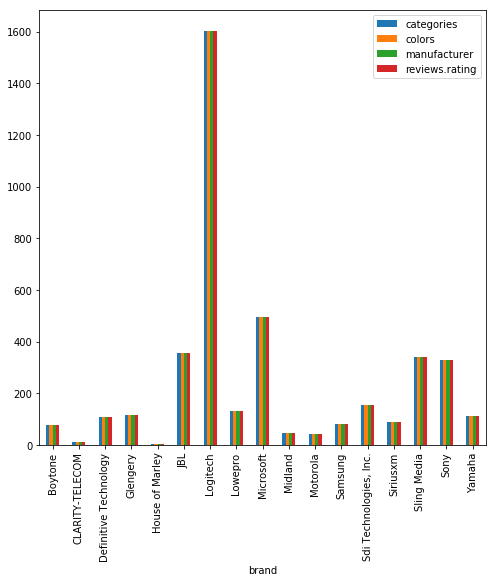

In [69]:
df.groupby(['brand']).count().plot(kind='bar',figsize=(8,8))

In [70]:
df.groupby(['brand']).sum()

,reviews.rating
brand,
Boytone,334.0
CLARITY-TELECOM,54.0
Definitive Technology,524.0
Glengery,486.0
House of Marley,13.0
JBL,1522.0
Logitech,6329.0
Lowepro,606.0
Microsoft,2280.0


In [71]:
df.groupby(['brand']).count()

,categories,colors,manufacturer,reviews.rating
brand,,,,
Boytone,75,75,75,75
CLARITY-TELECOM,11,11,11,11
Definitive Technology,108,108,108,108
Glengery,114,114,114,114
House of Marley,3,3,3,3
JBL,357,357,357,357
Logitech,1604,1604,1604,1604
Lowepro,131,131,131,131
Microsoft,495,495,495,495


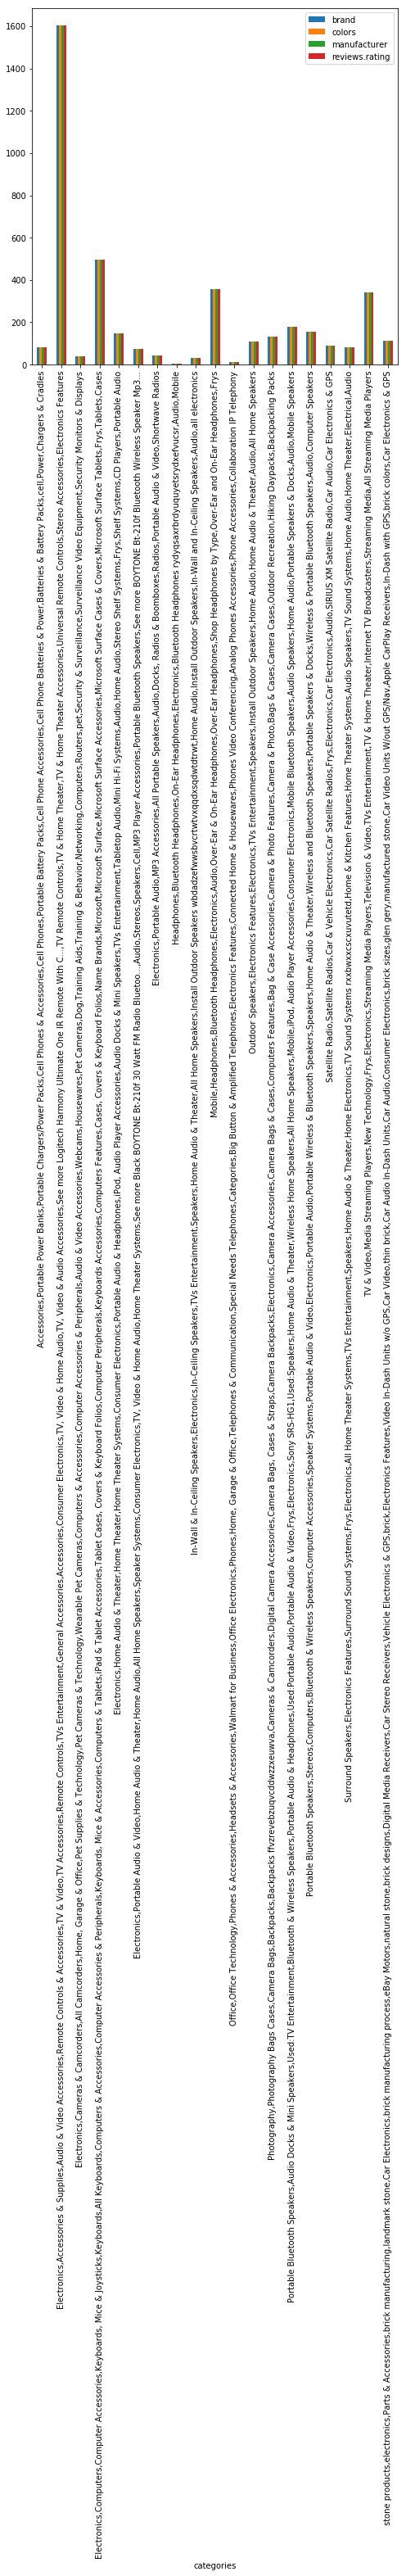

In [72]:
df.groupby(['categories']).count().plot(kind='bar',figsize=(8,8))

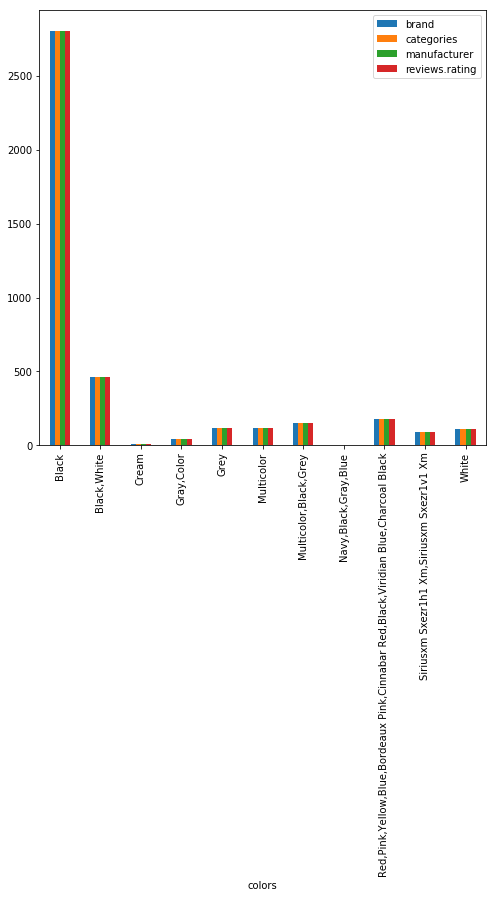

In [73]:
df.groupby(['colors']).count().plot(kind='bar',figsize=(8,8))

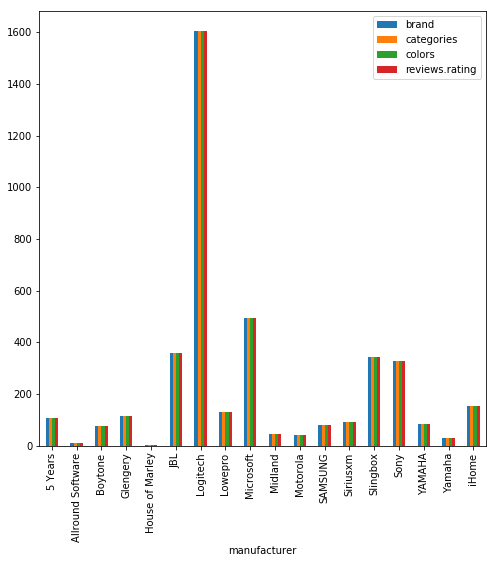

In [74]:
df.groupby(['manufacturer']).count().plot(kind='bar',figsize=(8,8))

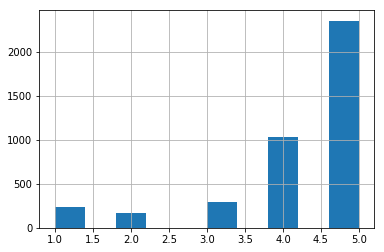

In [75]:
df['reviews.rating'].hist()

In [76]:
brand_enc = LabelEncoder()
cat_enc = LabelEncoder()
col_enc = LabelEncoder()
man_enc = LabelEncoder()
df['brand'] = brand_enc.fit_transform(df['brand'])
df['categories'] = cat_enc.fit_transform(df['categories'])
df['colors'] = col_enc.fit_transform(df['colors'])
df['manufacturer'] = man_enc.fit_transform(df['manufacturer'])
#df['reviews.rating'] = man_enc.fit_transform(df['reviews.rating'])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 0 to 7294
Data columns (total 5 columns):
brand             4088 non-null int64
categories        4088 non-null int64
colors            4088 non-null int64
manufacturer      4088 non-null int64
reviews.rating    4088 non-null float64
dtypes: float64(1), int64(4)
memory usage: 191.6 KB


In [78]:
x=df.iloc[:,:-1].values
y=df['reviews.rating'].values

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=0)

In [80]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)    # n_components = no of features
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [81]:
clfs = [LogisticRegression(),KNeighborsClassifier(n_neighbors=3),\
        KNeighborsClassifier(n_neighbors=5),KNeighborsClassifier(n_neighbors=50),\
       GaussianNB(),SVC(kernel="linear"),SVC(kernel="rbf"),DecisionTreeClassifier(),RandomForestClassifier()]
for clf in clfs:
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print("===================",clf)
    print('***********',clf.score(x_test,y_test)*100)
    print(classification_report(y_test,y_pred))


=================== LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
*********** 57.827788649706456
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00        54
        2.0       0.00      0.00      0.00        45
        3.0       0.00      0.00      0.00        77
        4.0       0.00      0.00      0.00       255
        5.0       0.58      1.00      0.73       591

avg / total       0.33      0.58      0.42      1022

=================== KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
*********** 34.73581213307241
             precision    recall  f1-score   support

        1.0       0.05      0.04      0.04

C:\Users\hebaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hebaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hebaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hebaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


=================== SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
*********** 57.827788649706456
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00        54
        2.0       0.00      0.00      0.00        45
        3.0       0.00      0.00      0.00        77
        4.0       0.00      0.00      0.00       255
        5.0       0.58      1.00      0.73       591

avg / total       0.33      0.58      0.42      1022



C:\Users\hebaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


=================== SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
*********** 57.827788649706456
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00        54
        2.0       0.00      0.00      0.00        45
        3.0       0.00      0.00      0.00        77
        4.0       0.00      0.00      0.00       255
        5.0       0.58      1.00      0.73       591

avg / total       0.33      0.58      0.42      1022

=================== DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
         

C:\Users\hebaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hebaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hebaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
df.columns

Index(['brand', 'categories', 'colors', 'manufacturer', 'reviews.rating'], dtype='object')

In [58]:
df['brand'] = brand_enc.inverse_transform(df['brand'])
df['categories'] = cat_enc.inverse_transform(df['categories'])
df['colors'] = col_enc.inverse_transform(df['colors'])
df['manufacturer'] = man_enc.inverse_transform(df['manufacturer'])
df.head()

C:\Users\hebaa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\hebaa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\hebaa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\hebaa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

,brand,categories,colors,manufacturer,reviews.rating
0,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,5.0
1,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,4.0
2,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,4.0
3,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,5.0
4,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,5.0


In [61]:
test=['Microsoft','Electronics,Computers,Computer Accessories,Key...','Black','Microsoft']
y_pred = LogisticRegression().predict(np.array(test).reshape(1, -1))
#reviews.rating.inverse_transform(y_pred)[0]

NotFittedError: This LogisticRegression instance is not fitted yet

In [60]:
LogisticRegression().fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
df.to_pickle("./dummy.pkl")

In [22]:
dummy=pd.read_pickle("./dummy.pkl")
dummy

,brand,categories,colors,manufacturer,reviews.rating
0,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,5.0
1,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,4.0
2,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,4.0
3,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,5.0
4,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,5.0
5,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,5.0
6,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,4.0
7,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,3.0
8,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,4.0
9,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,Microsoft,5.0


In [91]:
df['manufacturer'].value_counts()

Logitech             1604
Microsoft             495
JBL                   357
Slingbox              342
Sony                  327
iHome                 154
Lowepro               131
Glengery              114
5 Years               108
Siriusxm               90
YAMAHA                 83
SAMSUNG                80
Boytone                75
Midland                44
Motorola               40
Yamaha                 30
Allround Software      11
House of Marley         3
Name: manufacturer, dtype: int64

In [47]:
import webbrowser
f = open('helloworld.html','w')
code =classification_report(y_test,y_pred)
message = """\
<html>
  <head></head>
  <body>
    <p>
       <br><h1>{code}</h1><br>
    </p>
  </body>
</html>
""".format(code=code)
f.write(message)
f.close()
webbrowser.open_new_tab('helloworld.html')

C:\Users\hebaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


True

No handles with labels found to put in legend.


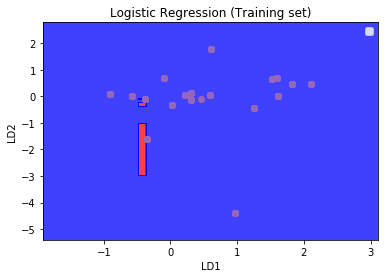

In [58]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                )
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()